___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
(Waad and Noof)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [7]:
# import dataframes
df_male = pd.read_csv("/content/ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("/content/ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [3]:
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date  \
0                     71               319  ...    Male   4-Oct-10   
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

In [8]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date  \
0                     71               319  ...    Male   4-Oct-10   
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

## Explore Data

In [5]:
df_copy.describe()

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
count 6068.000   4082.000                        6068.000        6068.000   
mean  1697.499  20003.371                         246.469        1406.161   
std   1133.004   6568.435                          37.400          79.091   
min      0.000  10027.000                         155.000        1115.000   
25%    758.000  14270.250                         219.000        1350.000   
50%   1516.500  17236.500                         242.000        1410.000   
75%   2564.250  27315.750                         271.000        1462.000   
max   4081.000  29452.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               6068.000            6068.000      6068.000   
mean                 327.374             224.891      1299.609   
std                   20.720              16.052        72.022   
min                  249.000             156.000      1038.000   
25%                  313.000             214.000      1249.000   
50%                  328.000             225.000      1302.000   
75%                  341.250             235.000      1349.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 6068.000          6068.000           6068.000   
mean                   244.193           194.755            399.204   
std                     16.845            13.516             30.237   
min                    186.000           151.000            283.000   
25%                    232.000           185.000            376.000   
50%                    245.000           195.000            404.000   
75%                    256.000           204.000            421.000   
max                    306.000           245.000            489.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   6068.000          6068.000          6068.000   
mean                     340.934           274.735           490.754   
std                       41.520            19.221            42.136   
min                      216.000           197.000           357.000   
25%                      311.000           262.000           460.000   
50%                      341.000           274.000           492.000   
75%                      370.000           288.000           520.000   
max                      490.000           362.000           637.000   

       bimalleolarbreadth  bitragionchinarc  ...  waistbacklength  \
count            6068.000          6068.000  ...         6068.000   
mean               72.253           324.897  ...          460.525   
std                 5.345            17.088  ...           36.678   
min                55.000           267.000  ...          345.000   
25%                68.000           314.000  ...          435.000   
50%                72.000           326.000  ...          463.000   
75%                76.000           336.000  ...          486.000   
max                91.000           385.000  ...          598.000   

       waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  \
count      6068.000            6068.000    6068.000                 6068.000   
mean        317.750             914.501     229.674                  377.004   
std          36.363             114.275      35.613                   31.618   
min         211.000             611.000     138.000                  289.000   
25%         292.000             829.000     203.000                  355.000   
50%         316.000             907.000     226.000                  375.000   
75%         343.000             992.000     252.250                  398.000   
max         461.000            1379.000     406.000                  494.000   

       waistheightomphalion  weightkg  wristcircumference  wristheight  \
count         

In [6]:
df_copy.describe(include="O").T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [7]:
df_copy["WritingPreference"].value_counts()

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [8]:
df_copy["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

#EDA

In [9]:
#define color
c= ['#FE3600','#fa894d','#fce760','#009d77','#b1eaeb']

##DODRace Distribution

In [10]:
DODRace_Distribution=df_copy['DODRace'].value_counts().sort_values(ascending=False)
DODRace_Distribution

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

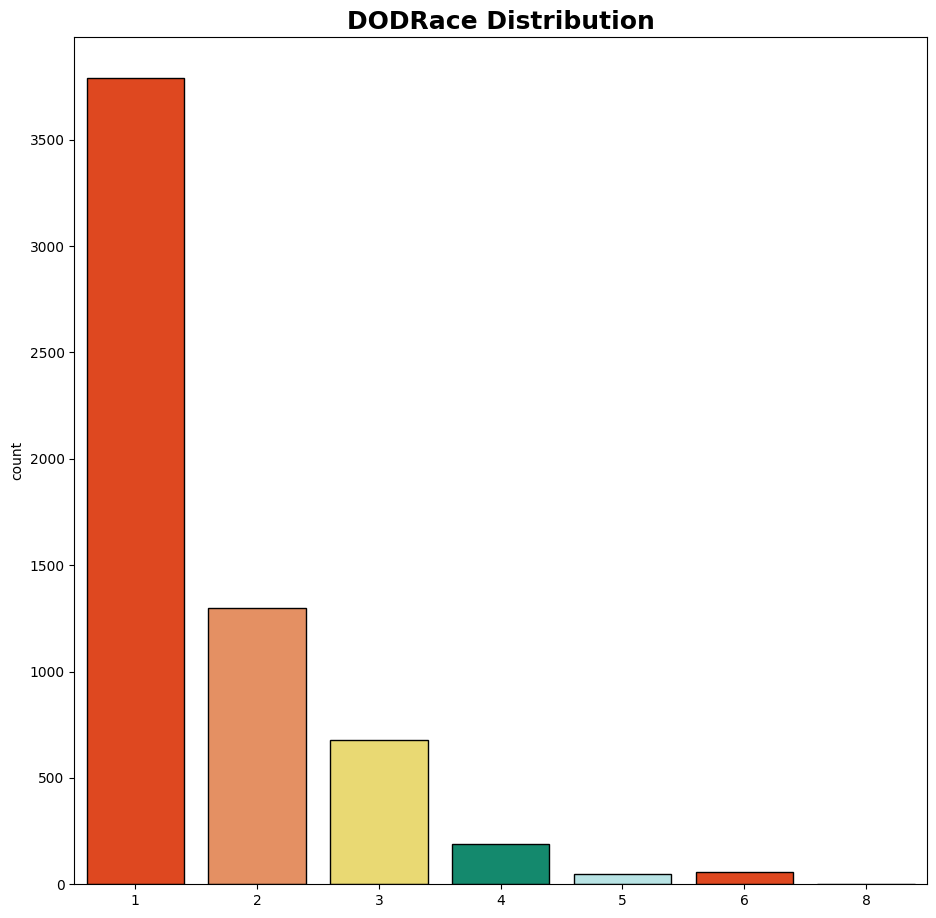

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(11,11))

# Add title
plt.title("DODRace Distribution",fontsize=18,weight = 'bold')

sns.barplot(x=DODRace_Distribution.index,y=DODRace_Distribution, palette=c, ci=False,edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=0)

plt.ylabel("count");

##WritingPreference Distribution

In [12]:
WritingPreference_Distribution=df_copy['WritingPreference'].value_counts().sort_values(ascending=False)
WritingPreference_Distribution

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

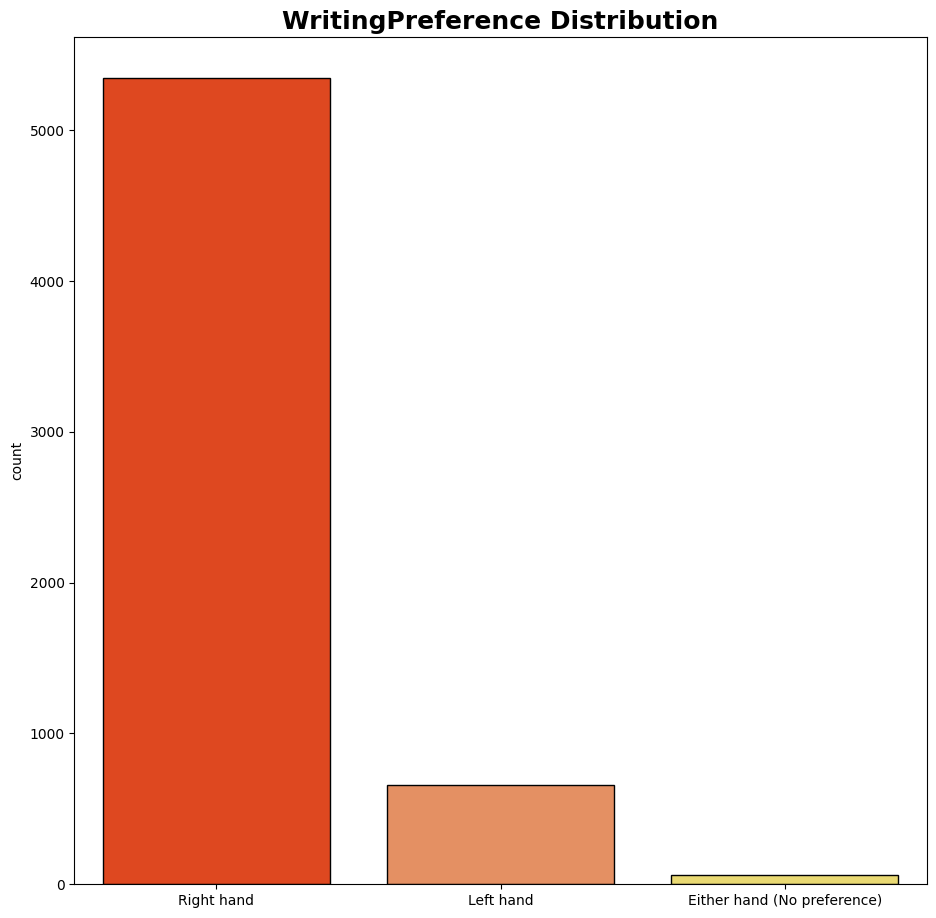

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(11,11))

# Add title
plt.title("WritingPreference Distribution",fontsize=18,weight = 'bold')

sns.barplot(x=WritingPreference_Distribution.index,y=WritingPreference_Distribution, palette=c, ci=False,edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=0)

plt.ylabel("count");

##Gender Distribution

In [14]:
Gender_Distribution=df_copy['Gender'].value_counts().sort_values(ascending=False)
Gender_Distribution

Male      4082
Female    1986
Name: Gender, dtype: int64

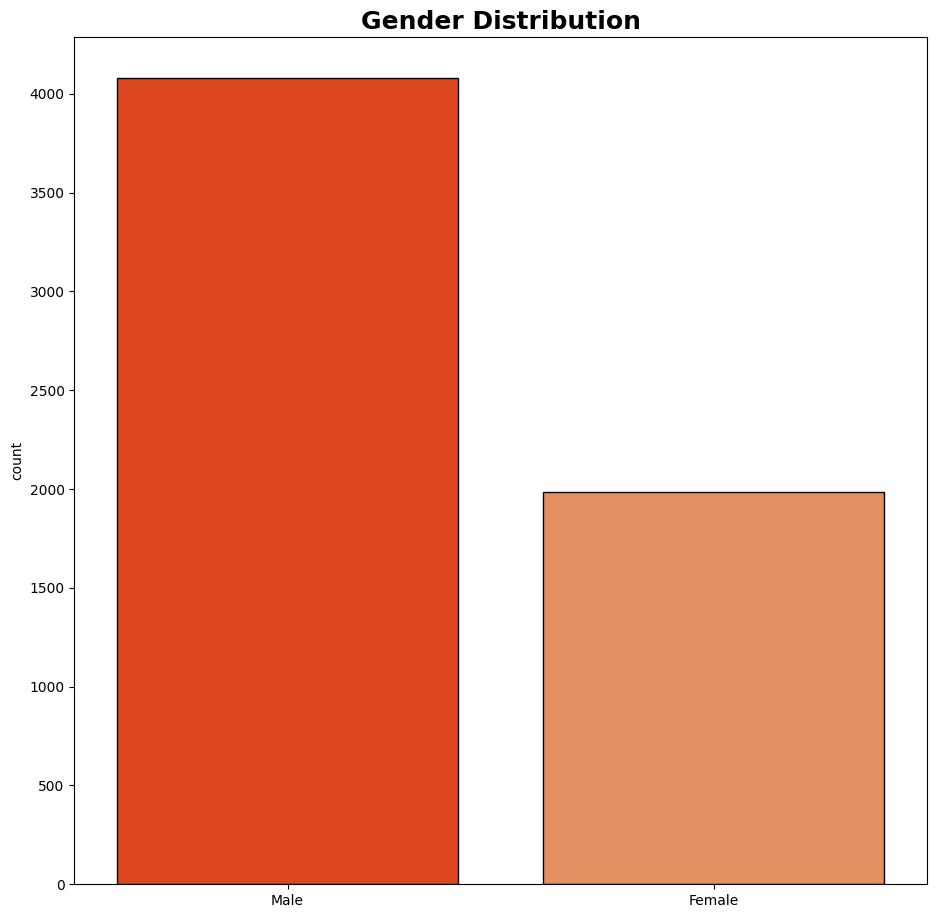

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(11,11))

# Add title
plt.title("Gender Distribution",fontsize=18,weight = 'bold')

sns.barplot(x=Gender_Distribution.index,y=Gender_Distribution, palette=c, ci=False,edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=0)

plt.ylabel("count");

##Age Distribution

In [16]:
Age_Distribution=df_copy['Age'].value_counts().sort_values(ascending=False)
Age_Distribution

21    383
22    372
23    354
24    336
20    320
     ... 
56     12
55      9
58      5
57      4
17      2
Name: Age, Length: 42, dtype: int64

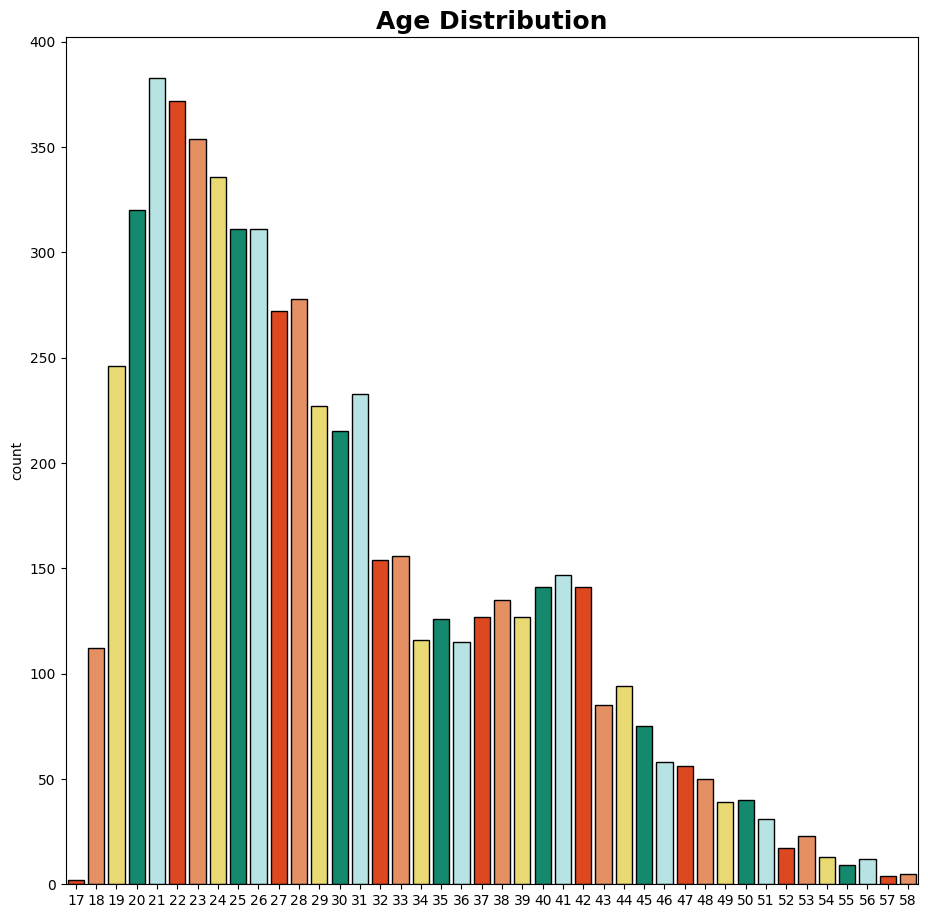

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(11,11))

# Add title
plt.title("Age Distribution",fontsize=18,weight = 'bold')

sns.barplot(x=Age_Distribution.index,y=Age_Distribution, palette=c, ci=False,edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=0)

plt.ylabel("count");

##weightkg Distribution

In [18]:
#weightkg
weightkg_Distribution=df_copy['weightkg'].value_counts().sort_values(ascending=False)
weightkg_Distribution

79.100    25
77.500    24
69.500    23
72.700    23
88.200    23
          ..
55.400     1
46.400     1
47.500     1
47.600     1
45.200     1
Name: weightkg, Length: 783, dtype: int64

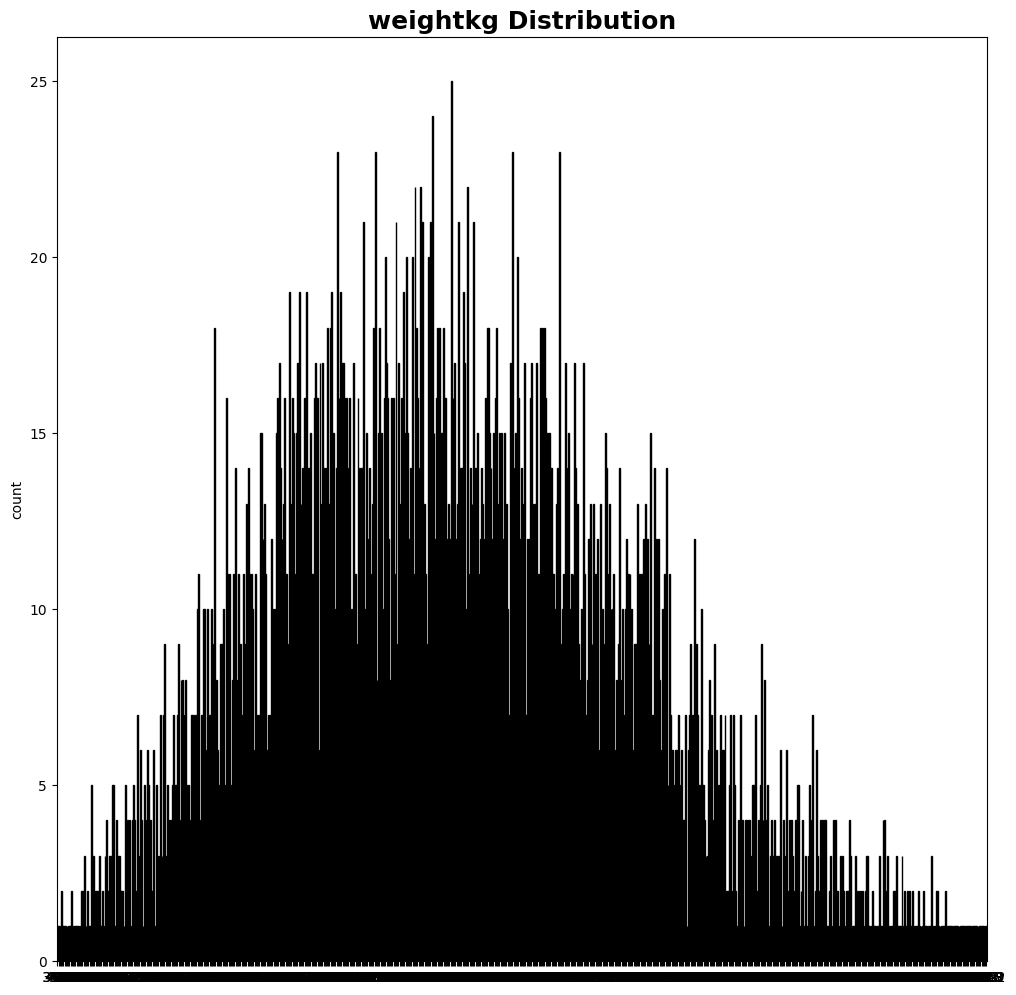

In [19]:
# Set the width and height of the figure
plt.figure(figsize=(12,12))

# Add title
plt.title("weightkg Distribution",fontsize=18,weight = 'bold')

sns.barplot(x=weightkg_Distribution.index,y=weightkg_Distribution, palette=c, ci=False,edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=0)

plt.ylabel("count");

##stature Distribution


In [20]:
#stature
stature_Distribution=df_copy['stature'].value_counts().sort_values(ascending=False)
stature_Distribution

1740    47
1745    40
1730    40
1674    39
1735    37
        ..
1937     1
1942     1
1895     1
1938     1
1463     1
Name: stature, Length: 481, dtype: int64

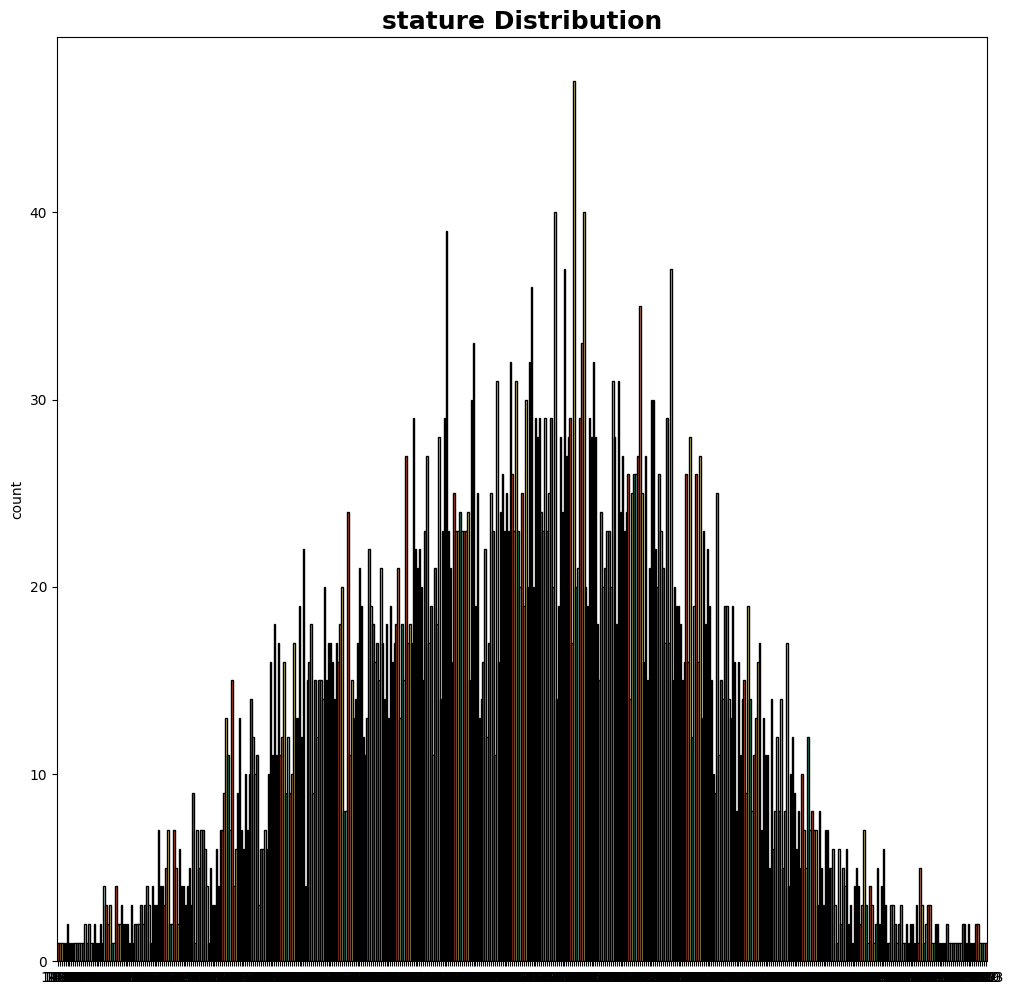

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(12,12))

# Add title
plt.title("stature Distribution",fontsize=18,weight = 'bold')

sns.barplot(x=stature_Distribution.index,y=stature_Distribution, palette=c, ci=False,edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=0)

plt.ylabel("count");

##Gender in Each Race

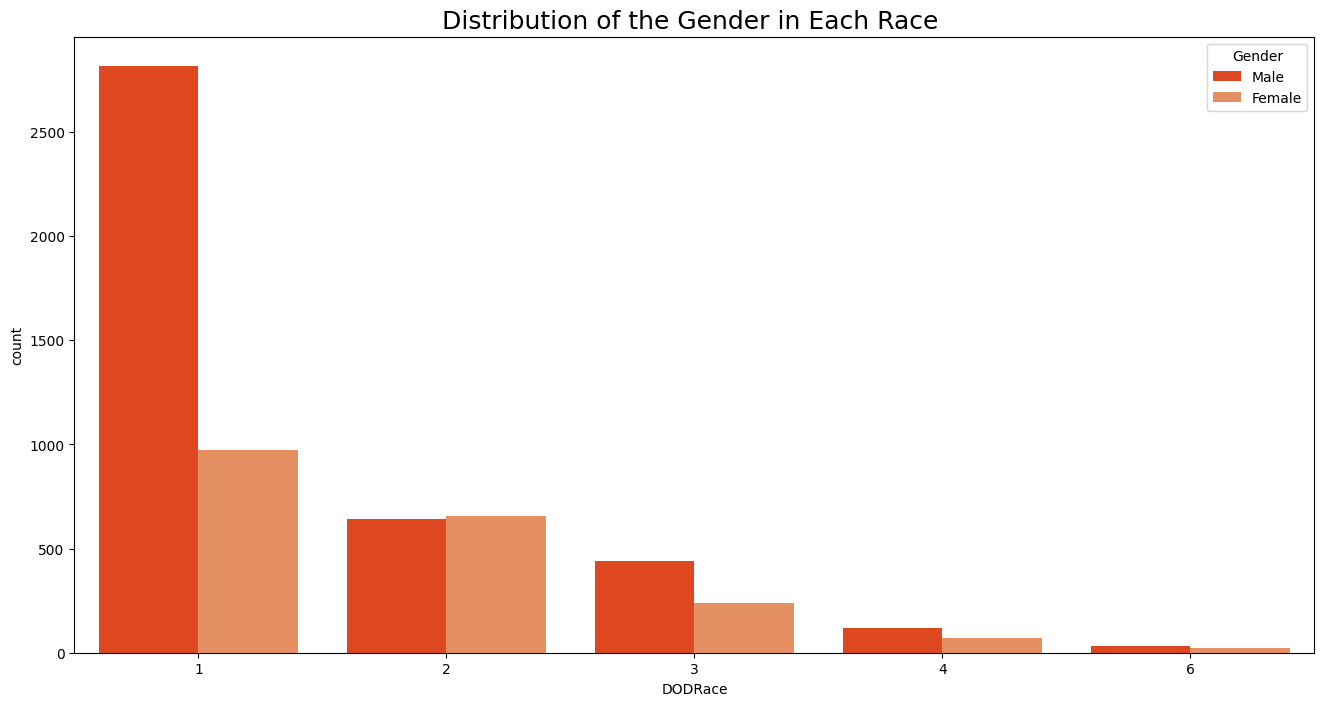

In [22]:
#Count of the Gender in Each Race
plt.figure(figsize=(16,8))
sns.countplot(x='DODRace',hue='Gender',data=df_copy,palette=c,order=df_copy['DODRace'].value_counts().nlargest(5).index)
plt.title("Distribution of the Gender in Each Race ",fontsize=18)
plt.show()

##WritingPreference in each Race

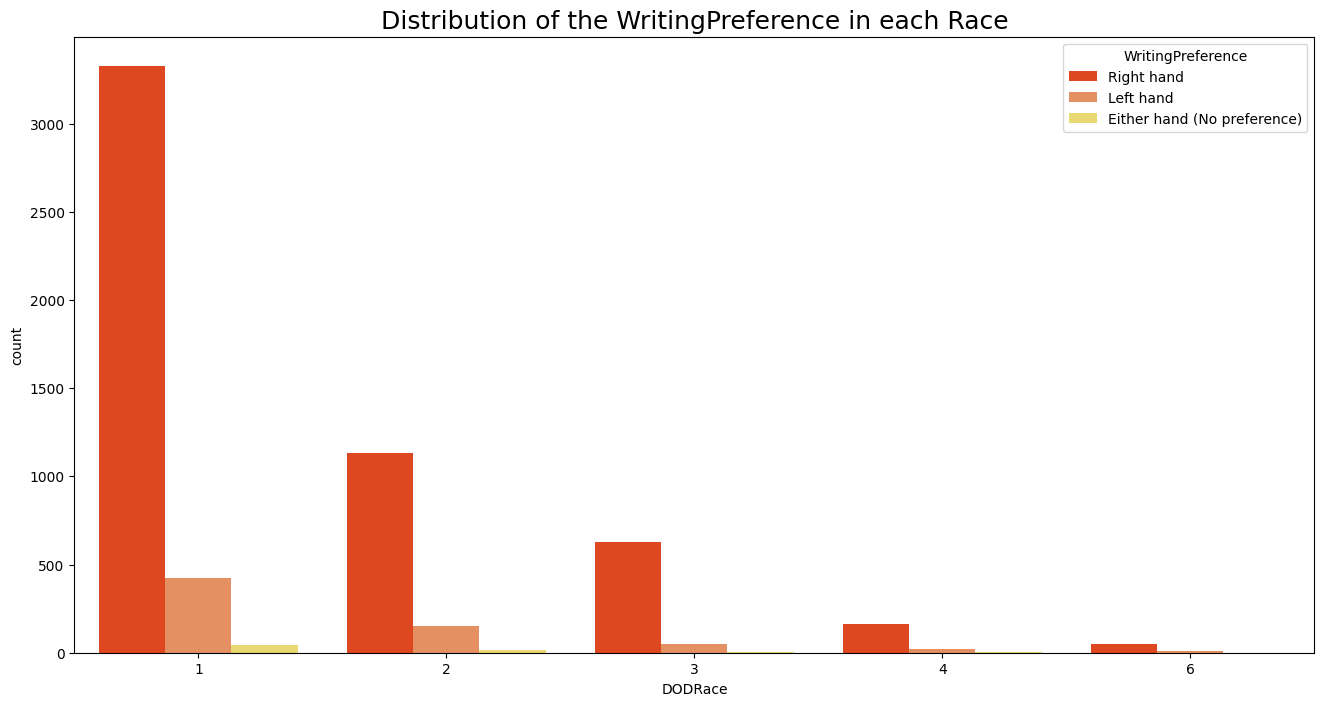

In [23]:
#Count of the WritingPreference in each Race
plt.figure(figsize=(16,8))
sns.countplot(x='DODRace',hue='WritingPreference',data=df_copy,palette=c,order=df_copy['DODRace'].value_counts().nlargest(5).index)
plt.title("Distribution of the WritingPreference in each Race",fontsize=18)
plt.show()

##Drop unnecessary Columns

In [9]:
df_copy = df_copy.drop(
    ["subjectid",
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)

# "SubjectsBirthLocation"
# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

In [10]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

abdominalextensiondepthsitting  acromialheight  \
DODRace                                                   
1                                  3792            3792   
2                                  1298            1298   
3                                   679             679   
4                                   188             188   
5                                    49              49   
6                                    59              59   
8                                     3               3   

         acromionradialelength  anklecircumference  axillaheight  \
DODRace                                                            
1                         3792                3792          3792   
2                         1298                1298          1298   
3                          679                 679           679   
4                          188                 188           188   
5                           49                  49            49   
6                           59                  59            59   
8                            3                   3             3   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
DODRace                                                                 
1                           3792              3792               3792   
2                           1298              1298               1298   
3                            679               679                679   
4                            188               188                188   
5                             49                49                 49   
6                             59                59                 59   
8                              3                 3                  3   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
DODRace                                                                  
1                             3792              3792              3792   
2                             1298              1298              1298   
3                              679               679               679   
4                              188               188               188   
5                               49                49                49   
6                               59                59                59   
8                                3                 3                 3   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
DODRace                                                                    
1                      3792              3792                       3792   
2                      1298              1298                       1298   
3                       679               679                        679   
4                       188               188                        188   
5                        49                49                         49   
6                        59                59                         59   
8                         3                 3                          3   

         bizygomaticbreadth  ...  trochanterionheight  \
DODRace                      ...                        
1                      3792  ...                 3792   
2                      1298  ...                 1298   
3                       679  ...                  679   
4                       188  ...                  188   
5                        49  ...                   49   
6                        59  ...                   59   
8                         3  ...                    3   

         verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
DODRace                                                                 
1                                 3792             3792          3792   
2                                 1298             1298          1298   
3                                  679          

In [11]:
# Just DODRace with > 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  ...  \
0                  319                        291                 142  ...   
1                  344                        320                 135  ...   
2                  345                        330                 135  ...   
3                  328                        309                 143  ...   
4                  340                        310                 138  ...   
...                ...                        ...                 ...  ...   
6063               306                        282                 136  .

In [12]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [13]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

##Check missing value

In [14]:
# # Check missing value
# df_copy.isnull().sum()

Nulls = 0
for column in df_copy:
    # Check for null values in each column
    null_values = df_copy[column].isnull().sum()
    Nulls = null_values + Nulls


# # Set display options to show all columns
# pd.set_option('display.max_columns', None)

# Display the null values for each column
Nulls

0

##Check null values

In [15]:
# The is better to detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df_copy.columns:
    # Calculate the number of null values in the column
    null_count = df_copy[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##Check duplicates columns

In [16]:
# Check duplicates
df.duplicated().sum()

0

##Correlation matrix

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

##Heatmap

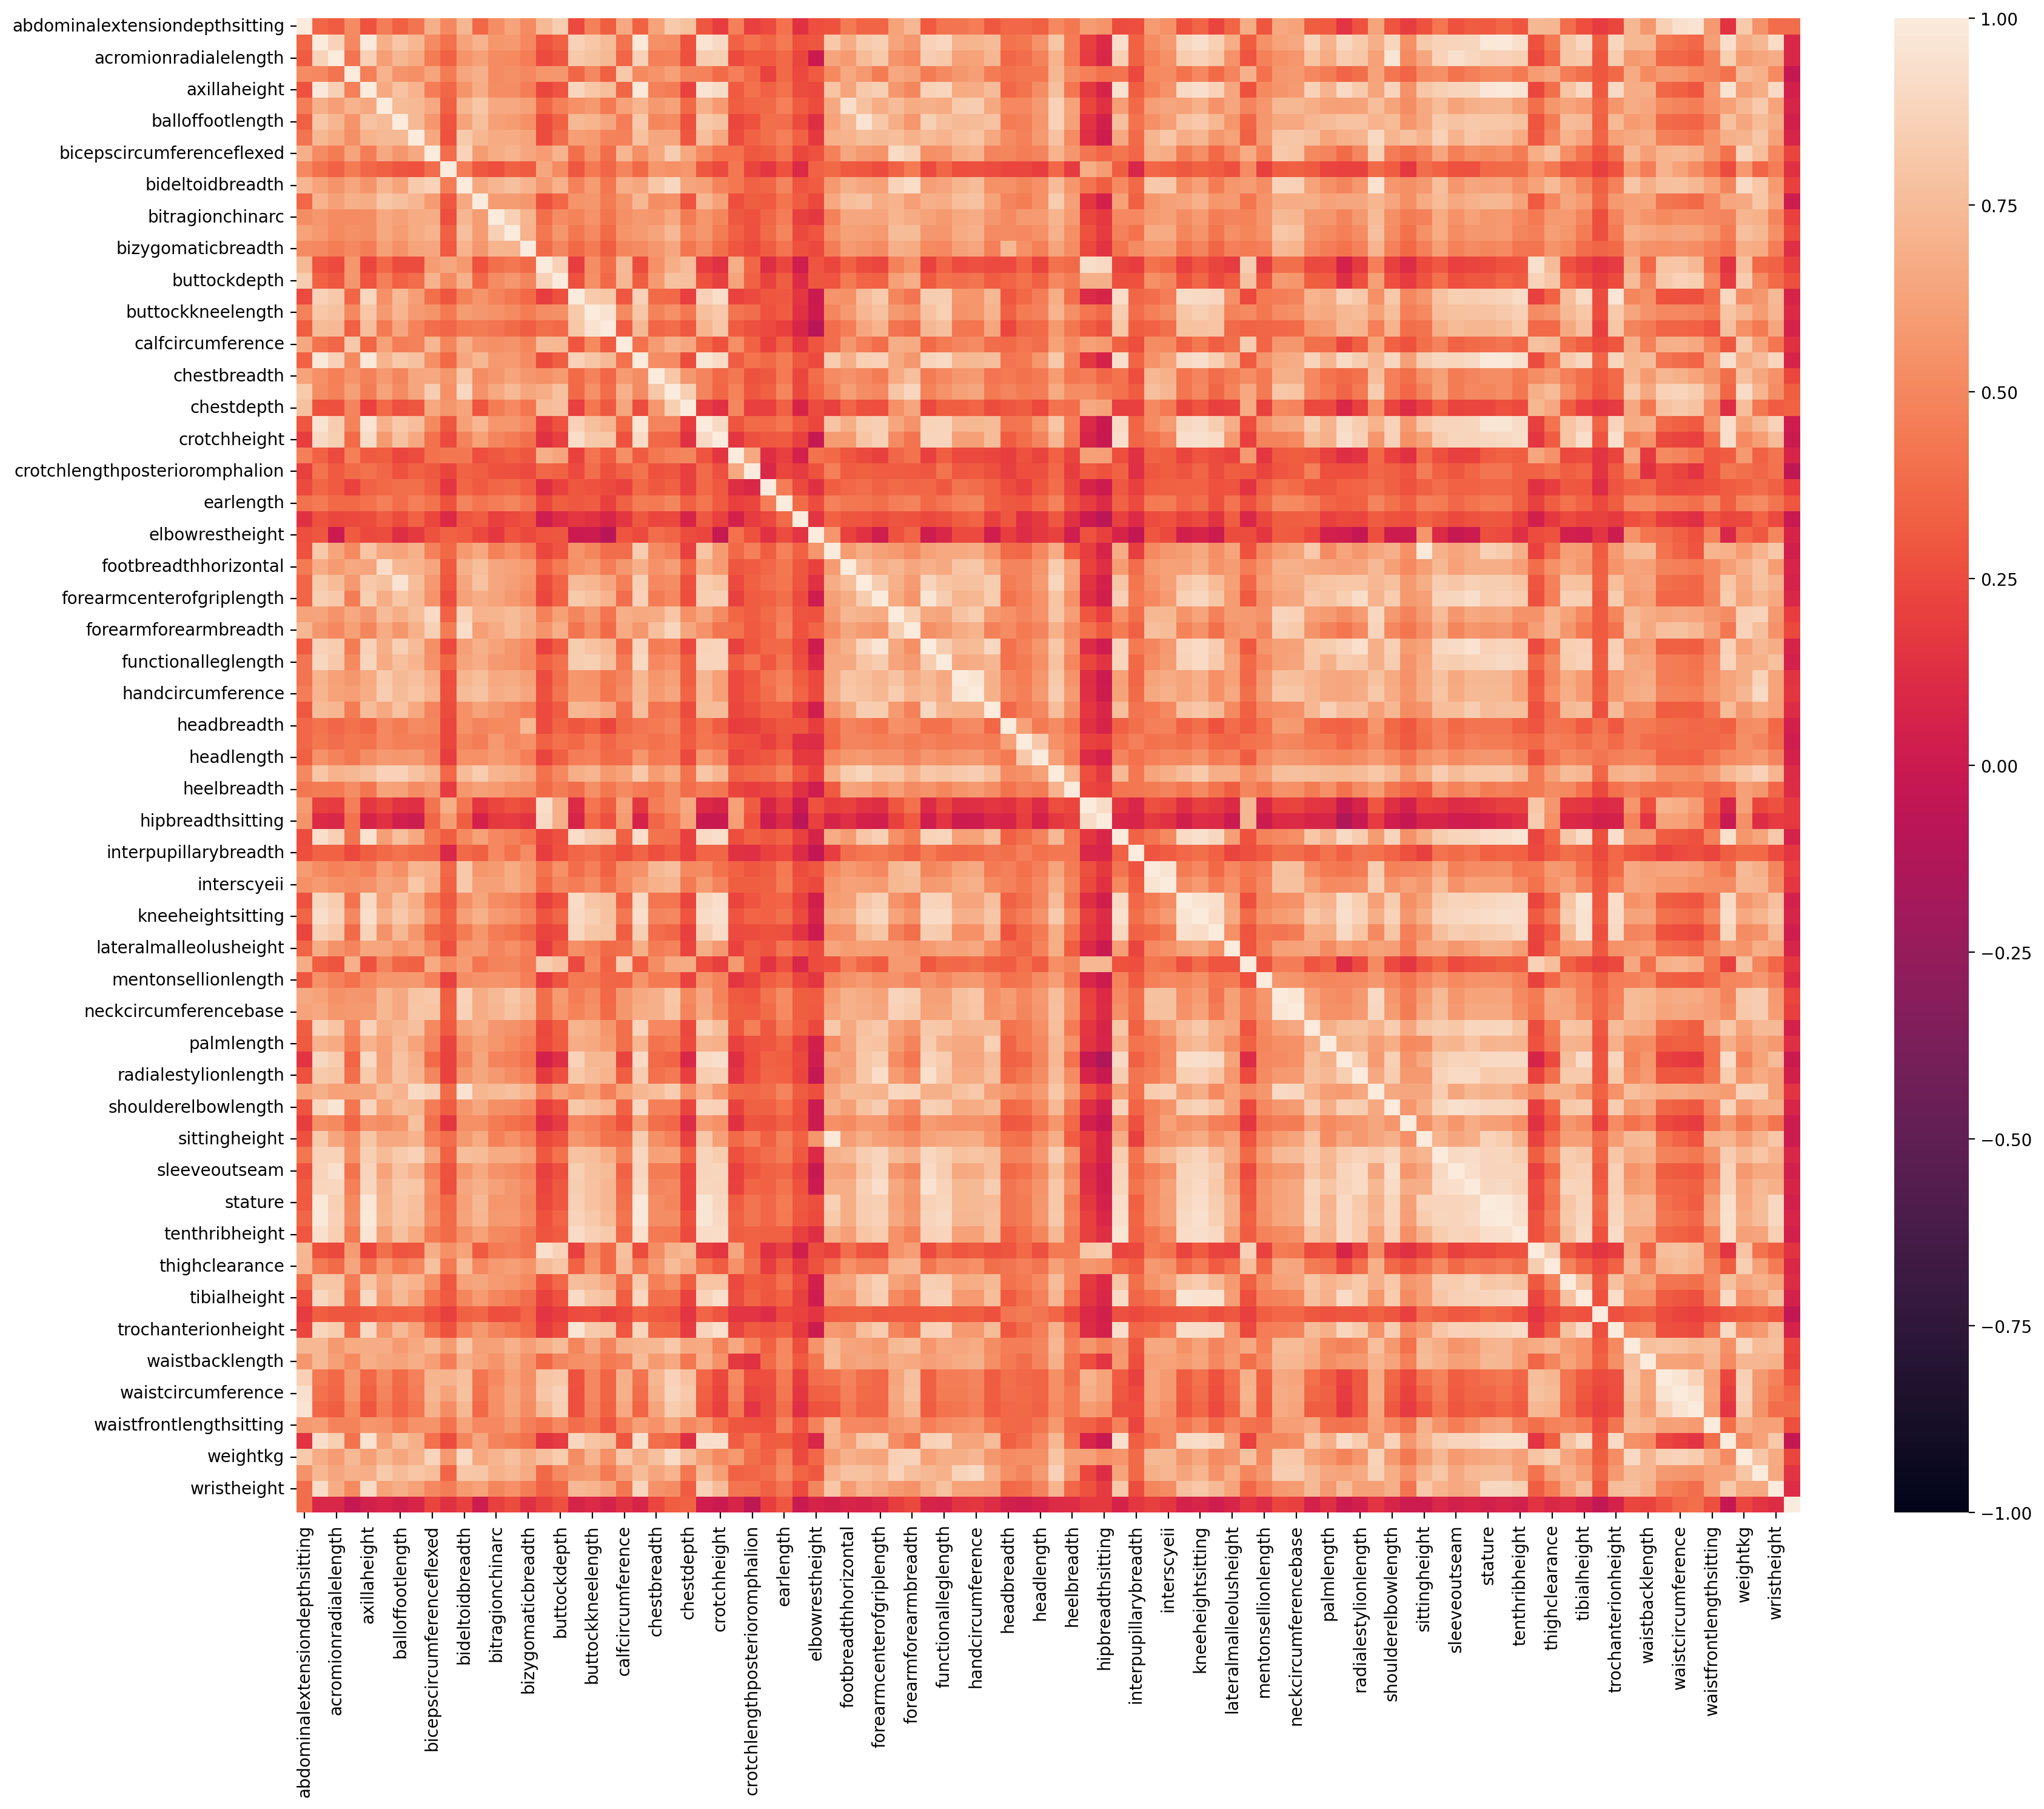

In [15]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1);

In [16]:
df_copy.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: float64(1), int64(93), object(4)
memory usage: 4.4+ MB


In [17]:
df_copy.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [52]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [19]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [20]:
import sklearn

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

column_trans = column_trans.set_output(transform="pandas")

In [22]:
df_copy.shape

(5769, 98)

In [54]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [56]:
y_train

5165    White
5393    White
5659    White
3628    White
2914    White
        ...  
5346    White
4192    White
887     White
3891    White
5015    White
Name: DODRace, Length: 4615, dtype: object

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [49]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   8  12]
 [  6  79  51]
 [  7  25 726]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94       260
    Hispanic       0.71      0.58      0.64       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.82      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 978    7   53]
 [  20  350  173]
 [  31   66 2937]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.95      1038
    Hispanic       0.83      0.64      0.72       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.85      0.87      4615
weighted avg       0.92      0.92      0.92      4615



### Cross validation

In [50]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.523
score_time                 0.037
test_accuracy              0.897
train_accuracy             0.925
test_precision_weighted    0.893
train_precision_weighted   0.922
test_recall_weighted       0.897
train_recall_weighted      0.925
test_f1_weighted           0.893
train_f1_weighted          0.922
dtype: float64

For Hispanics, there is too much imbalance, so we are going to focus on improving these values.




In [27]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels=["Hispanic"])
recall_hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [52]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.455
score_time                 0.035
test_f1_hispanic           0.644
train_f1_hispanic          0.724
test_precision_hispanic    0.738
train_precision_hispanic   0.822
test_recall_hispanic       0.575
train_recall_hispanic      0.647
dtype: float64

### Logistic Model GridsearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [54]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    solver='saga'))])

In [55]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.768
mean_train_score   0.828
Name: 11, dtype: object

In [56]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[238  13   9]
 [  6 109  21]
 [ 12  89 657]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.52      0.80      0.63       136
       White       0.96      0.87      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 969   34   35]
 [  22  450   71]
 [  64  351 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



# Class weight for logisticRegression Model

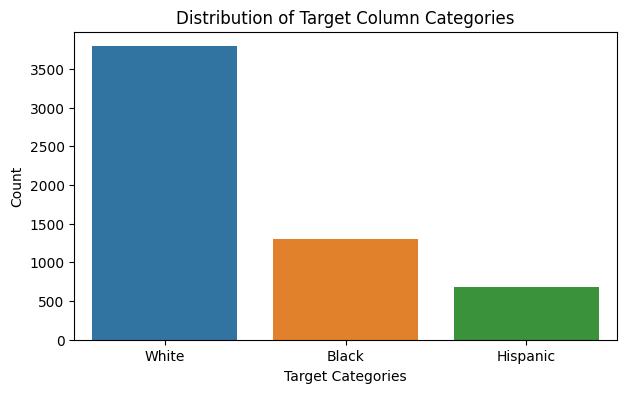

In [57]:
# demonstrate the target column distribution
sns.countplot(x="DODRace", data=df_copy)
plt.title("Distribution of Target Column Categories")
plt.xlabel("Target Categories")
plt.ylabel("Count")
plt.show()

In [58]:
# converting the dependent variable to float
df["DODRace"] = df["DODRace"].astype(float)

In [59]:
# Try to maximize the Recall score by balance the data
lr = LogisticRegression(C=10, solver="saga", class_weight="balanced")

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_balanced = Pipeline(steps=operations)

pipe_model_balanced.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='saga'))])

In [60]:
eval_metric(pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[237  14   9]
 [  5 107  24]
 [ 14  92 652]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 982   34   22]
 [  17  460   66]
 [  68  342 2624]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [61]:
# change the class_weight to None

lr = LogisticRegression(C=10, solver="saga", class_weight=None)

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_None = Pipeline(steps=operations)

pipe_model_None.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [62]:
eval_metric(pipe_model_None, X_train, y_train, X_test, y_test)

Test_Set
[[237   8  15]
 [  4  83  49]
 [  5  23 730]]
              precision    recall  f1-score   support

       Black       0.96      0.91      0.94       260
    Hispanic       0.73      0.61      0.66       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.87      0.83      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 969   10   59]
 [  22  335  186]
 [  31   65 2938]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94      1038
    Hispanic       0.82      0.62      0.70       543
       White       0.92      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.84      0.86      4615
weighted avg       0.92      0.92      0.92      4615



In [63]:
!pip install scikit-plot

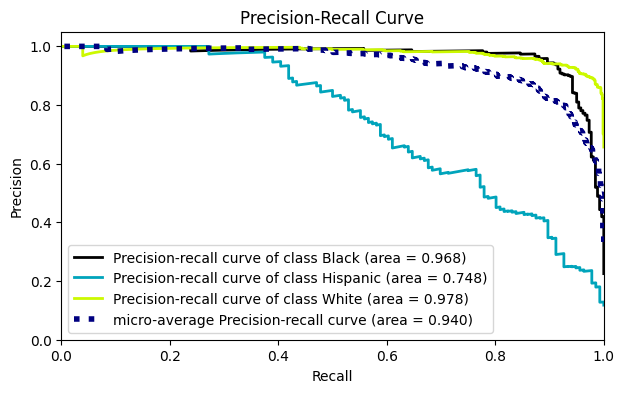

In [64]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve

operations = [
    ("encoder", column_trans),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(C=0.1, class_weight="balanced", solver="saga")),
]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model

In [65]:
from sklearn.svm import SVC



operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[229   1  30]
 [  5  52  79]
 [  6   9 743]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.92       260
    Hispanic       0.84      0.38      0.53       136
       White       0.87      0.98      0.92       758

    accuracy                           0.89      1154
   macro avg       0.89      0.75      0.79      1154
weighted avg       0.89      0.89      0.87      1154


Train_Set
[[ 949    4   85]
 [  23  263  257]
 [  11   15 3008]]
              precision    recall  f1-score   support

       Black       0.97      0.91      0.94      1038
    Hispanic       0.93      0.48      0.64       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.93      0.80      0.84      4615
weighted avg       0.92      0.91      0.91      4615



In [66]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.566
train_f1_hispanic          0.637
test_precision_hispanic    0.893
train_precision_hispanic   0.936
test_recall_hispanic       0.416
train_recall_hispanic      0.483
dtype: float64

In [67]:
#SVM with balancing

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  11  14]
 [  6 102  28]
 [ 10  87 661]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.51      0.75      0.61       136
       White       0.94      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 985   22   31]
 [  13  488   42]
 [  43  313 2678]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.59      0.90      0.71       543
       White       0.97      0.88      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.86      4615
weighted avg       0.92      0.90      0.91      4615



In [68]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.595
train_f1_hispanic          0.716
test_precision_hispanic    0.500
train_precision_hispanic   0.593
test_recall_hispanic       0.739
train_recall_hispanic      0.903
dtype: float64

###  SVC Model GridsearchCV

In [69]:
param_grid = {'SVC__C': [0.01, 0.03, 0.02, 0.1],
               'SVC__gamma': [0.03,0.01 ,0.1],
#               'SVC__kernel': ['rbf', 'linear'],
#               'SVC__class_weight': ["balanced", None]
#               'SVC__degree':[2,3]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True,
                              verbose=2)

In [70]:
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.03, 0.02, 0.1],
                         'SVC__gamma': [0.03, 0.01, 0.1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [71]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('SVC', SVC(C=0.1, gamma=0.01))])

In [72]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.098
mean_train_score   0.116
Name: 10, dtype: object

In [73]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[142   0 118]
 [  2  15 119]
 [  0   0 758]]
              precision    recall  f1-score   support

       Black       0.99      0.55      0.70       260
    Hispanic       1.00      0.11      0.20       136
       White       0.76      1.00      0.86       758

    accuracy                           0.79      1154
   macro avg       0.92      0.55      0.59      1154
weighted avg       0.84      0.79      0.75      1154


Train_Set
[[ 588    0  450]
 [  12   69  462]
 [   2    0 3032]]
              precision    recall  f1-score   support

       Black       0.98      0.57      0.72      1038
    Hispanic       1.00      0.13      0.23       543
       White       0.77      1.00      0.87      3034

    accuracy                           0.80      4615
   macro avg       0.92      0.56      0.60      4615
weighted avg       0.84      0.80      0.76      4615



In [74]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model_grid,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits


test_f1_hispanic           0.176
train_f1_hispanic          0.208
test_precision_hispanic    1.000
train_precision_hispanic   1.000
test_recall_hispanic       0.098
train_recall_hispanic      0.116
dtype: float64

## 3. RF

### Vanilla RF Model

In [75]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [77]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[198   5  57]
 [  9  10 117]
 [ 17   5 736]]
              precision    recall  f1-score   support

       Black       0.88      0.76      0.82       260
    Hispanic       0.50      0.07      0.13       136
       White       0.81      0.97      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.60      0.61      1154
weighted avg       0.79      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [78]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [79]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[180   0  80]
 [ 10   2 124]
 [  7   0 751]]
              precision    recall  f1-score   support

       Black       0.91      0.69      0.79       260
    Hispanic       1.00      0.01      0.03       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.90      0.57      0.56      1154
weighted avg       0.84      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [80]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=101))])

In [81]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[197  45  18]
 [ 14  87  35]
 [ 68 306 384]]
              precision    recall  f1-score   support

       Black       0.71      0.76      0.73       260
    Hispanic       0.20      0.64      0.30       136
       White       0.88      0.51      0.64       758

    accuracy                           0.58      1154
   macro avg       0.59      0.63      0.56      1154
weighted avg       0.76      0.58      0.62      1154


Train_Set
[[ 765  174   99]
 [  55  353  135]
 [ 284 1072 1678]]
              precision    recall  f1-score   support

       Black       0.69      0.74      0.71      1038
    Hispanic       0.22      0.65      0.33       543
       White       0.88      0.55      0.68      3034

    accuracy                           0.61      4615
   macro avg       0.60      0.65      0.57      4615
weighted avg       0.76      0.61      0.65      4615



In [82]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [83]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])


scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [84]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.072
train_f1_hispanic          1.000
test_precision_hispanic    0.692
train_precision_hispanic   1.000
test_recall_hispanic       0.039
train_recall_hispanic      1.000
dtype: float64

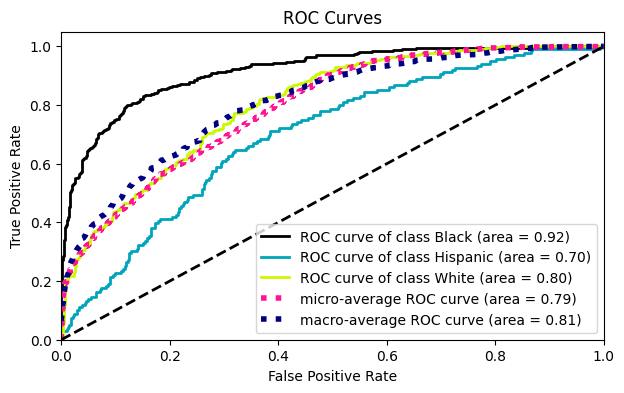

In [85]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();


In [86]:
pipe_model["RF_model"].feature_importances_

array([1.73964482e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.33668424e-03, 1.38758417e-03, 8.48786323e-04, 9.16509347e-03,
       1.72033220e-04, 1.07195002e-03, 0.00000000e+00, 2.10208676e-03,
       4.36956097e-02, 7.00002914e-04, 5.68328186e-04, 5.59206507e-03,
       6.66318016e-04, 4.04651604e-03, 0.00000000e+00, 1.37076351e-03,
       2.77532757e-02, 4.41155339e-02, 5.88704190e-02, 0.00000000e+00,
       1.29696426e-02, 1.48564744e-03, 2.58630884e-03, 5.93358660e-04,
       5.02928379e-03, 1.74164999e-02, 0.00000000e+00, 6.57474176e-04,
       0.00000000e+00, 1.89177697e-02, 3.05486553e-02, 1.17256256e-01,
       5.80433795e-02, 0.00000000e+00, 4.88011373e-04, 1.84548863e-02,
       1.44671576e-03, 1.72823324e-03, 1.91956198e-02, 1.53075238e-03,
       0.00000000e+00, 1.68793550e-03, 2.00701288e-02, 7.64515360e-04,
       9.17224688e-03, 3.56995354e-03, 3.20256837e-04, 2.67773402e-02,
       2.08918954e-03, 4.45610814e-04, 1.73700231e-02, 4.54550834e-02,
      

In [87]:
features = pipe_model["encoder"].get_feature_names_out()
features

array(['Gender', 'WritingPreference', 'SubjectsBirthLocation',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbread

In [88]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_,
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
elbowrestheight                      0.117
sittingheight                        0.090
buttockpopliteallength               0.059
eyeheightsitting                     0.058
interpupillarybreadth                0.045
...                                    ...
sleevelengthspinewrist               0.000
buttockcircumference                 0.000
earbreadth                           0.000
shoulderlength                       0.000
WritingPreference                    0.000

[97 rows x 1 columns]

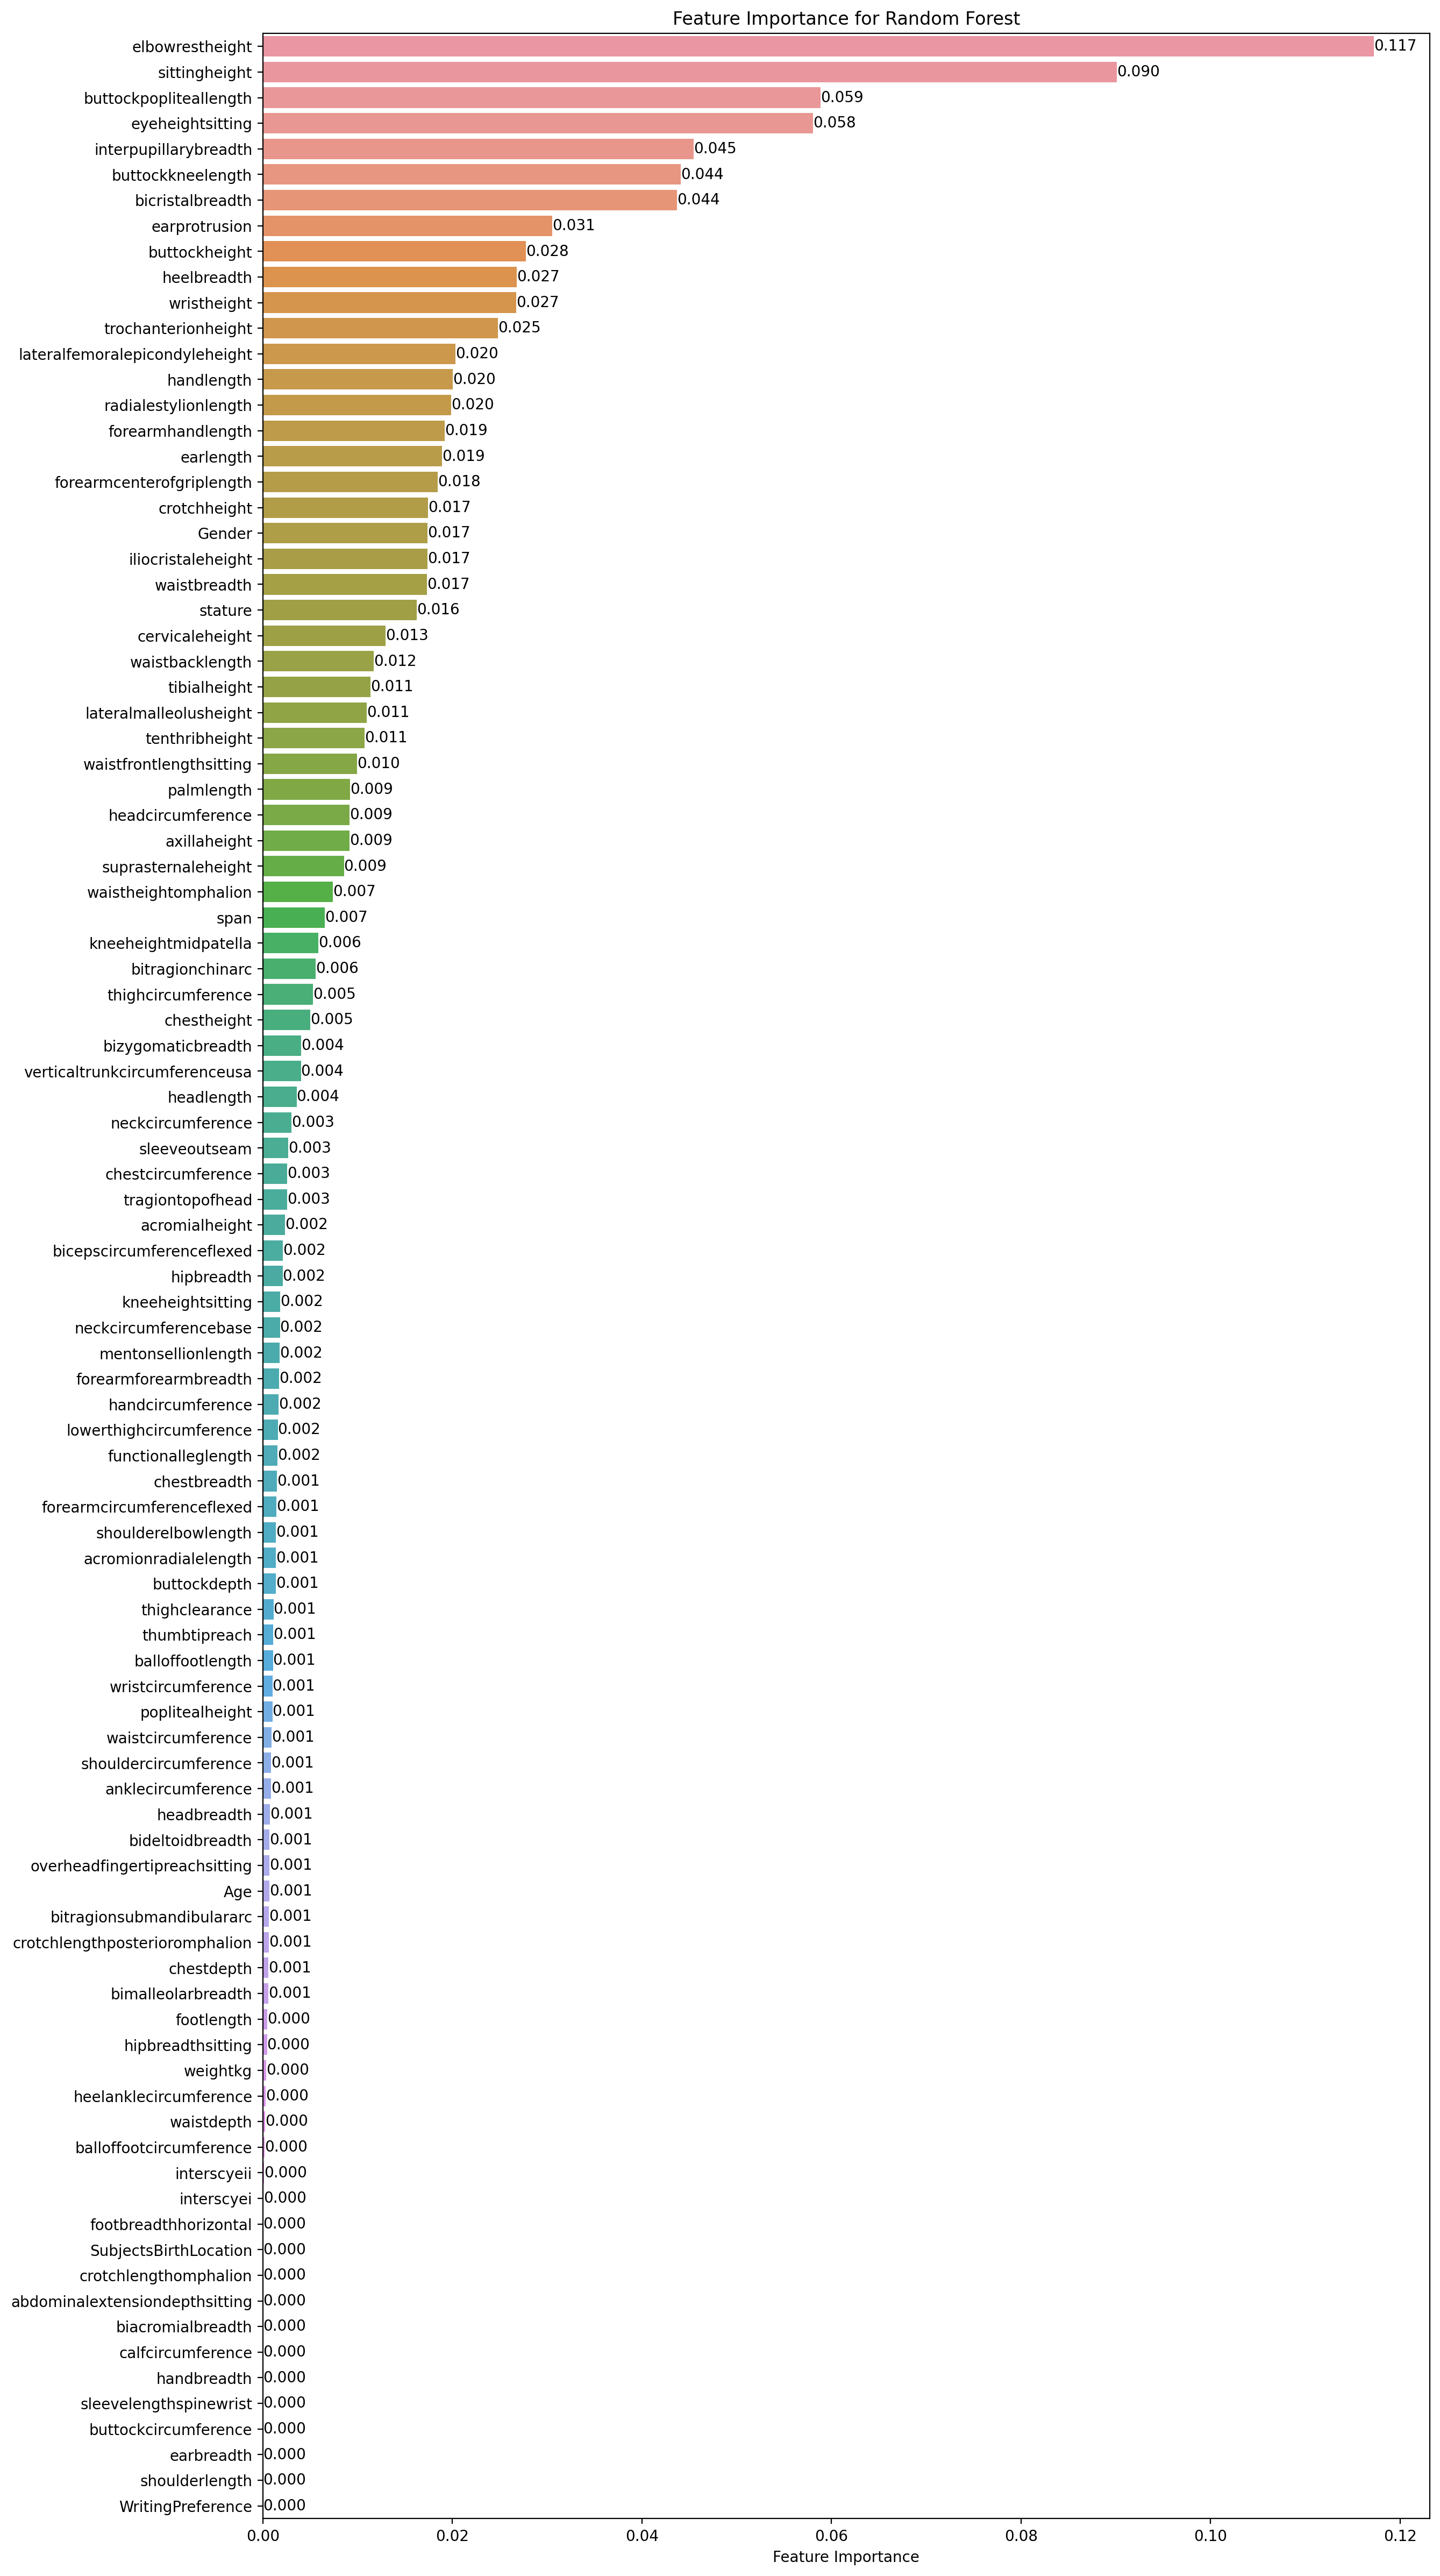

In [89]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [90]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features, #features_names=X.columns
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);


In [91]:
RF_model = RandomForestClassifier(random_state=101,
                                  max_samples=0.5)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])

In [92]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

Test_Set
[[193   3  64]
 [ 11  10 115]
 [ 16   5 737]]
              precision    recall  f1-score   support

       Black       0.88      0.74      0.80       260
    Hispanic       0.56      0.07      0.13       136
       White       0.80      0.97      0.88       758

    accuracy                           0.81      1154
   macro avg       0.75      0.60      0.60      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[1017    0   21]
 [   5  430  108]
 [   1    0 3033]]
              precision    recall  f1-score   support

       Black       0.99      0.98      0.99      1038
    Hispanic       1.00      0.79      0.88       543
       White       0.96      1.00      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.98      0.92      0.95      4615
weighted avg       0.97      0.97      0.97      4615



### RF Model GridsearchCV

In [93]:
# param_grid = {'n_estimators':[64, 128, 200],
#              'max_features':[2, 4, 'sqrt']
#              'max_depth':[2, 3, 4],
#              'min_samples_split':[2, 3,4],
#              'min_samples_leaf': [2,3,4],
#              'max_samples':[0.8, 1]}


param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

In [96]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [97]:
%%time
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
CPU times: user 17.4 s, sys: 1.19 s, total: 18.6 s
Wall time: 11min 13s


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [98]:
# eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

In [99]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [100]:
rf_grid_model.best_score_

0.6371049949031601

In [101]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[143  74  43]
 [  4  88  44]
 [ 45 315 398]]
              precision    recall  f1-score   support

       Black       0.74      0.55      0.63       260
    Hispanic       0.18      0.65      0.29       136
       White       0.82      0.53      0.64       758

    accuracy                           0.55      1154
   macro avg       0.58      0.57      0.52      1154
weighted avg       0.73      0.55      0.60      1154


Train_Set
[[ 578  290  170]
 [  38  348  157]
 [ 211 1099 1724]]
              precision    recall  f1-score   support

       Black       0.70      0.56      0.62      1038
    Hispanic       0.20      0.64      0.31       543
       White       0.84      0.57      0.68      3034

    accuracy                           0.57      4615
   macro avg       0.58      0.59      0.53      4615
weighted avg       0.73      0.57      0.62      4615



## 4. XGBoost All Features

### Vanilla XGBoost Model

In [28]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [29]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [30]:
import sklearn

In [110]:
sklearn.__version__  # 1.3.1

'1.2.2'

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [31]:
df_copy.shape

(5769, 98)

In [32]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [33]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [33]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [34]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [37]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



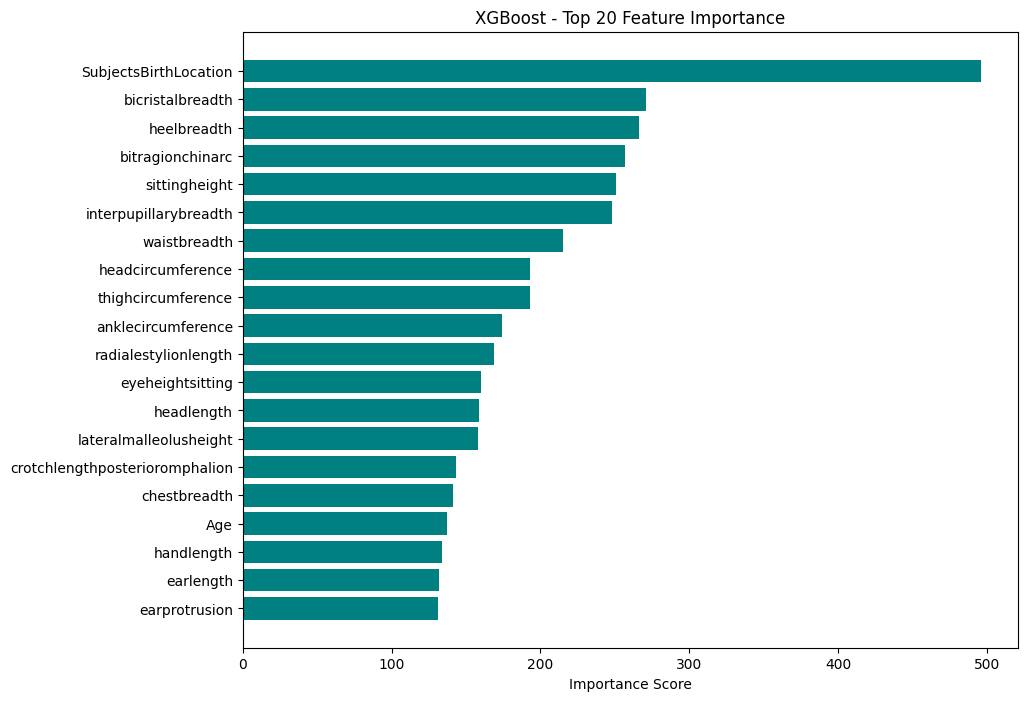

In [38]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [39]:
features

('SubjectsBirthLocation',
 'bicristalbreadth',
 'heelbreadth',
 'bitragionchinarc',
 'sittingheight',
 'interpupillarybreadth',
 'waistbreadth',
 'headcircumference',
 'thighcircumference',
 'anklecircumference',
 'radialestylionlength',
 'eyeheightsitting',
 'headlength',
 'lateralmalleolusheight',
 'crotchlengthposterioromphalion',
 'chestbreadth',
 'Age',
 'handlength',
 'earlength',
 'earprotrusion',
 'wristcircumference',
 'buttockpopliteallength',
 'tragiontopofhead',
 'bizygomaticbreadth',
 'elbowrestheight',
 'bicepscircumferenceflexed',
 'buttockkneelength',
 'calfcircumference',
 'waistfrontlengthsitting',
 'forearmhandlength',
 'chestdepth',
 'palmlength',
 'buttockdepth',
 'bitragionsubmandibulararc',
 'crotchlengthomphalion',
 'thighclearance',
 'mentonsellionlength',
 'wristheight',
 'lowerthighcircumference',
 'shoulderelbowlength',
 'waistbacklength',
 'forearmcenterofgriplength',
 'handbreadth',
 'thumbtipreach',
 'bimalleolarbreadth',
 'shouldercircumference',
 'chest

### CV XGBoost Model

In [40]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   4.712
score_time                 0.027
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [44]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':1, 'black':2, 'hispanic': 3

# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [45]:
from sklearn.model_selection import cross_val_score, cross_validate


pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   2.855
score_time                 0.025
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

#### GridSearch

In [46]:

# param_grid = {"xgboost__n_estimators":[50, 100, 200],
#               'xgboost__max_depth':[3,4,5],
#               "xgboost__learning_rate": [0.1, 0.2],
#               "xgboost__subsample":[0.5, 0.8, 1],
#               "xgboost__colsample_bytree":[0.5,0.7, 1],
#              "xgboost__reg_alpha": [0, 0.25, 0.5, 0.75, 1],
# }

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.4s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      cal...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [48]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [49]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.361
mean_train_score   0.715
Name: 193, dtype: object

In [50]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[227   5  28]
 [  8  51  77]
 [  8  12 738]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       260
           1       0.75      0.38      0.50       136
           2       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[ 987    2   49]
 [  23  353  167]
 [   6   11 3017]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1038
           1       0.96      0.65      0.78       543
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.96      0.87      0.90      4615
weighted avg       0.95      0.94      0.94      4615



#### Random Serach

In [51]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)



Streaming output truncated to the last 5000 lines.
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.681, xgboost__max_depth=7, xgboost__n_estimators=62, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.681, xgboost__max_depth=7, xgboost__n_estimators=62, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.681, xgboost__max_depth=7, xgboost__n_estimators=62, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.681, xgboost__max_depth=7, xgboost__n_estimators=62, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [52]:
# Print the best hyperparameters
print(random_search.best_params_)

{'xgboost__subsample': 0.5, 'xgboost__reg_alpha': 0.1, 'xgboost__n_estimators': 121, 'xgboost__max_depth': 10, 'xgboost__learning_rate': 1.561, 'xgboost__gamma': 7.0, 'xgboost__colsample_bytree': 0.6}


In [53]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.429
mean_train_score   0.663
Name: 74, dtype: object

In [54]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[212  17  31]
 [ 13  52  71]
 [ 21  51 686]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       260
           1       0.43      0.38      0.41       136
           2       0.87      0.91      0.89       758

    accuracy                           0.82      1154
   macro avg       0.72      0.70      0.71      1154
weighted avg       0.82      0.82      0.82      1154


Train_Set
[[ 953   21   64]
 [  32  378  133]
 [  46  105 2883]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1038
           1       0.75      0.70      0.72       543
           2       0.94      0.95      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.87      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



###  XGBoost Partial Features

In [55]:
# These features chosen one by one after looking in the box plots of each feature along with the ditrbution in each of the three clases


columns_to_keep = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength',
                   'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight',
                   'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestbreadth',
                   'chestheight', 'crotchheight', 'earlength', 'earprotrusion', 'elbowrestheight',
                   'eyeheightsitting', 'forearmcenterofgriplength', 'forearmforearmbreadth',
                   'forearmhandlength', 'handbreadth', 'handlength', 'headbreadth', 'headcircumference',
                   'headlength', 'heelbreadth', 'iliocristaleheight', 'interscyei', 'interscyeii',
                   'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight',
                   'lateralmalleolusheight', 'neckcircumference', 'neckcircumferencebase',
                   'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
                   'shoulderelbowlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span',
                   'stature', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance',
                   'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight',
                   'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference',
                   'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight',
                   'SubjectsBirthLocation', 'Age', 'Gender', 'WritingPreference', 'DODRace']

df_partial = df_copy[columns_to_keep]

In [56]:
df_partial.shape

(5769, 67)

In [57]:
display(df_partial.describe())
print("Number of nulls",df_partial.isnull().sum().sum())

acromialheight  acromionradialelength  axillaheight  balloffootlength  \
count        5769.000               5769.000      5769.000          5769.000   
mean         1408.630                328.072      1301.903           195.119   
std            78.303                 20.445        71.261            13.379   
min          1146.000                249.000      1062.000           151.000   
25%          1353.000                314.000      1252.000           186.000   
50%          1412.000                328.000      1304.000           196.000   
75%          1464.000                342.000      1351.000           205.000   
max          1683.000                393.000      1553.000           245.000   

       biacromialbreadth  bitragionchinarc  bizygomaticbreadth  buttockheight  \
count           5769.000          5769.000            5769.000       5769.000   
mean             399.706           324.962             139.529        872.113   
std               30.124            17.050               7.249         54.065   
min              283.000           267.000             116.000        656.000   
25%              377.000           314.000             134.000        834.000   
50%              404.000           326.000             140.000        870.000   
75%              422.000           336.000             145.000        908.000   
max              489.000           385.000             166.000       1080.000   

       buttockkneelength  buttockpopliteallength  cervicaleheight  \
count           5769.000                5769.000         5769.000   
mean             610.450                 498.332         1479.952   
std               33.121                  28.513           83.591   
min              479.000                 380.000         1208.000   
25%              587.000                 478.000         1421.000   
50%              610.000                 498.000         1487.000   
75%              633.000                 518.000         1539.000   
max              736.000                 605.000         1738.000   

       chestbreadth  chestheight  crotchheight  earlength  ...  \
count      5769.000     5769.000      5769.000   5769.000  ...   
mean        283.233     1254.290       827.106     62.606  ...   
std          20.612       78.882        54.056      4.862  ...   
min         213.000     1000.000       610.000     46.000  ...   
25%         269.000     1199.000       789.000     59.000  ...   
50%         283.000     1261.000       827.000     62.000  ...   
75%         297.000     1310.000       864.000     66.000  ...   
max         363.000     1506.000      1031.000     81.000  ...   

       thighcircumference  thighclearance  thumbtipreach  tibialheight  \
count            5769.000        5769.000       5769.000      5769.000   
mean              623.584         176.696        791.045       459.389   
std                57.530          16.124         53.487        29.275   
min               412.000         121.000        602.000       347.000   
25%               585.000         166.000        754.000       439.000   
50%               622.000         176.000        793.000       459.000   
75%               661.000         187.000        828.000       479.000   
max               870.000         259.000        998.000       584.000   

       tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  \
count          5769.000             5769.000                       5769.000   
mean            129.580              884.659                       1632.471   
std               6.636               53.766                         98.204   
min             105.000              660.000                       1342.000   
25%             125.000              847.000                       1561.000   
50%             130.000              883.000                       1631.000   
75%             134.000              920.000                       1697.000   
max             150.000             1095

Number of nulls 0


In [58]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_partial["DODRace"] = df_partial.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_partial["DODRace"]

0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [59]:
# Split the data
X = df_partial.drop(["DODRace"], axis=1)
y = df_partial["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [60]:
y

0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [61]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [62]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [64]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[208   7  45]
 [  9  47  80]
 [ 11  12 735]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       260
           1       0.71      0.35      0.47       136
           2       0.85      0.97      0.91       758

    accuracy                           0.86      1154
   macro avg       0.83      0.71      0.74      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### CV XGBoost Model

In [65]:
from sklearn.model_selection import cross_val_score, cross_validate



# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=5,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   1.994
score_time                 0.022
test_accuracy              0.857
train_accuracy             1.000
test_precision_weighted    0.848
train_precision_weighted   1.000
test_recall_weighted       0.857
train_recall_weighted      1.000
test_f1_weighted           0.842
train_f1_weighted          1.000
dtype: float64

In [36]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [37]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   3.449
score_time                 0.028
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

#### Grid Serach of partial Features


In [4]:

# param_grid = {"xgboost__n_estimators":[50, 100, 200],
#               'xgboost__max_depth':[3,4,5],
#               "xgboost__learning_rate": [0.1, 0.2],
#               "xgboost__subsample":[0.5, 0.8, 1],
#               "xgboost__colsample_bytree":[0.5,0.7, 1],
#              "xgboost__reg_alpha": [0, 0.25, 0.5, 0.75, 1],
# }

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}



In [38]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      cal...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [39]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [40]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.361
mean_train_score   0.715
Name: 193, dtype: object

In [41]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[227   5  28]
 [  8  51  77]
 [  8  12 738]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       260
           1       0.75      0.38      0.50       136
           2       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[ 987    2   49]
 [  23  353  167]
 [   6   11 3017]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1038
           1       0.96      0.65      0.78       543
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.96      0.87      0.90      4615
weighted avg       0.95      0.94      0.94      4615



#### Random Serach of partial Features


In [42]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=500,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.481, xgboost__max_depth=9, xgboost__n_estimators=119, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.481, xgboost__max_depth=9, xgboost__n_estimators=119, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.481, xgboost__max_depth=9, xgboost__n_estimators=119, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.481, xgboost__max_depth=9, xgboost__n_estimators=119, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [43]:
# Print the best hyperparameters
print(random_search.best_params_)


{'xgboost__subsample': 0.6, 'xgboost__reg_alpha': 0.4, 'xgboost__n_estimators': 4, 'xgboost__max_depth': 5, 'xgboost__learning_rate': 2.601, 'xgboost__gamma': 3.0, 'xgboost__colsample_bytree': 0.8999999999999999}


In [44]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.582
mean_train_score   0.700
Name: 156, dtype: object

In [45]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[152  84  24]
 [ 14 103  19]
 [134 455 169]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       260
           1       0.16      0.76      0.26       136
           2       0.80      0.22      0.35       758

    accuracy                           0.37      1154
   macro avg       0.49      0.52      0.39      1154
weighted avg       0.66      0.37      0.38      1154


Train_Set
[[ 694  313   31]
 [  59  452   32]
 [ 393 1828  813]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1038
           1       0.17      0.83      0.29       543
           2       0.93      0.27      0.42      3034

    accuracy                           0.42      4615
   macro avg       0.57      0.59      0.45      4615
weighted avg       0.77      0.42      0.45      4615



---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [82]:
!pip install imblearn

In [92]:
# Using the ClusterCentroids to balance the target column in training data
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Logistic Regression "Over Sampling"

In [136]:
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

over = SMOTE(sampling_strategy={"Hispanic": 1500})
X_resampled, y_resampled = over.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

[('Black', 1038), ('Hispanic', 1500), ('White', 3034)]


In [137]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=10, solver='saga')

In [138]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [139]:
eval_metric_(lr_resampled, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[209  28  23]
 [  7  73  56]
 [  9  68 681]]
              precision    recall  f1-score   support

       Black       0.93      0.80      0.86       260
    Hispanic       0.43      0.54      0.48       136
       White       0.90      0.90      0.90       758

    accuracy                           0.83      1154
   macro avg       0.75      0.75      0.75      1154
weighted avg       0.85      0.83      0.84      1154


Train_Set
[[ 868   77   93]
 [  98  711  691]
 [  55  242 2737]]
              precision    recall  f1-score   support

       Black       0.85      0.84      0.84      1038
    Hispanic       0.69      0.47      0.56      1500
       White       0.78      0.90      0.84      3034

    accuracy                           0.77      5572
   macro avg       0.77      0.74      0.75      5572
weighted avg       0.77      0.77      0.76      5572



## Logistic Regression "Under Sampling"

## **Remember that while SMOTE can be helpful in many situations, it's not a one-size-fits-all solution, and its effectiveness can vary depending on the specific problem and dataset. It's important to carefully evaluate the performance of your model after using SMOTE and consider other techniques such as adjusting class weights or using different sampling strategies if necessary.**

In [140]:
#Using Somte to under sampling the data

X_train_encoded_under = column_trans.fit_transform(X_train)
X_test_encoded_under= column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
under = RandomUnderSampler(sampling_strategy={"White": 2500})


In [141]:
X_resampled_under, y_resampled_under = over.fit_resample(X_train_encoded_under,  y_train)

print(sorted(Counter(y_resampled).items()))

[('Black', 1038), ('Hispanic', 1500), ('White', 3034)]


In [142]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=10, solver='saga')

In [143]:
eval_metric_(lr_resampled, X_resampled_under, y_resampled_under, X_test, y_test)

Test_Set
[[209  28  23]
 [  7  73  56]
 [  9  68 681]]
              precision    recall  f1-score   support

       Black       0.93      0.80      0.86       260
    Hispanic       0.43      0.54      0.48       136
       White       0.90      0.90      0.90       758

    accuracy                           0.83      1154
   macro avg       0.75      0.75      0.75      1154
weighted avg       0.85      0.83      0.84      1154


Train_Set
[[ 868   77   93]
 [  98  711  691]
 [  55  242 2737]]
              precision    recall  f1-score   support

       Black       0.85      0.84      0.84      1038
    Hispanic       0.69      0.47      0.56      1500
       White       0.78      0.90      0.84      3034

    accuracy                           0.77      5572
   macro avg       0.77      0.74      0.75      5572
weighted avg       0.77      0.77      0.76      5572



# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn.linear_model import LogisticRegression

In [145]:
operations = [("encoder", column_trans),("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [66]:
X

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  ...  \
0                  319                        291                 142  ...   
1                  344                        320                 135  ...   
2                  345                        330                 135  ...   
3                  328                        309                 143  ...   
4                  340                        310                 138  ...   
...                ...                        ...                 ...  ...   
6063               306                        282                 136  .

In [146]:
final_model.fit(X, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [68]:
X.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        5769.000        5769.000               5769.000   
mean                          247.254        1408.630                328.072   
std                            37.458          78.303                 20.445   
min                           155.000        1146.000                249.000   
25%                           220.000        1353.000                314.000   
50%                           243.000        1412.000                328.000   
75%                           272.000        1464.000                342.000   
max                           451.000        1683.000                393.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            5769.000      5769.000                 5769.000   
mean              225.202      1301.903                  244.408   
std                15.966        71.261                   16.804   
min               156.000      1062.000                  186.000   
25%               214.000      1252.000                  233.000   
50%               225.000      1304.000                  245.000   
75%               235.000      1351.000                  256.000   
max               293.000      1553.000                  306.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          5769.000           5769.000                   5769.000   
mean            195.119            399.706                    341.663   
std              13.379             30.124                     41.271   
min             151.000            283.000                    216.000   
25%             186.000            377.000                    312.000   
50%             196.000            404.000                    342.000   
75%             205.000            422.000                    370.000   
max             245.000            489.000                    490.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          5769.000          5769.000            5769.000   
mean            274.903           491.455              72.335   
std              19.240            42.012               5.327   
min             197.000           357.000              55.000   
25%             262.000           461.000              68.000   
50%             274.000           493.000              73.000   
75%             288.000           520.000              76.000   
max             362.000           637.000              91.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  ...  \
count          5769.000                   5769.000            5769.000  ...   
mean            324.962                    306.678             139.529  ...   
std              17.050                     20.819               7.249  ...   
min             267.000                    245.000             116.000  ...   
25%             314.000                    292.000             134.000  ...   
50%             326.000                    307.000             140.000  ...   
75%             336.000                    321.000             145.000  ...   
max             385.000                    390.000             166.000  ...   

       thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  \
count       5769.000      5769.000          5769.000             5769.000   
mean         791.045       459.389           129.580              884.659   
std           53.487        29.275             6.636               53.766   
min          602.000       347.000           105.000              660.000   
25%          754.000       439.000           125.000              847.000   
50%          793.000       459.000           130.000              883.000   
75%          828.000       479.000           134.000              920.000   
max          998.000       584.000           150.000             1095.000   

       verticaltrunkcir

In [78]:
mean_pepole = X.describe().loc["mean"]
mean_pepole

abdominalextensiondepthsitting    247.254
acromialheight                   1408.630
acromionradialelength             328.072
anklecircumference                225.202
axillaheight                     1301.903
                                   ...   
waistheightomphalion             1033.591
weightkg                           80.098
wristcircumference                169.308
wristheight                       831.335
Age                                29.776
Name: mean, Length: 94, dtype: float64

##Test the model

In [79]:
final_model.predict(X.loc[[300]])

array(['White'], dtype=object)

We ask the model to predict the observation in row 300 and it predicted it as White.

In [80]:
y[300]

'White'

We looked at the actual value of the observation in row 300, it was also White. That's means our model makes correct prediction.

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [147]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.789902354244164

In [148]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7810458964628978

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___